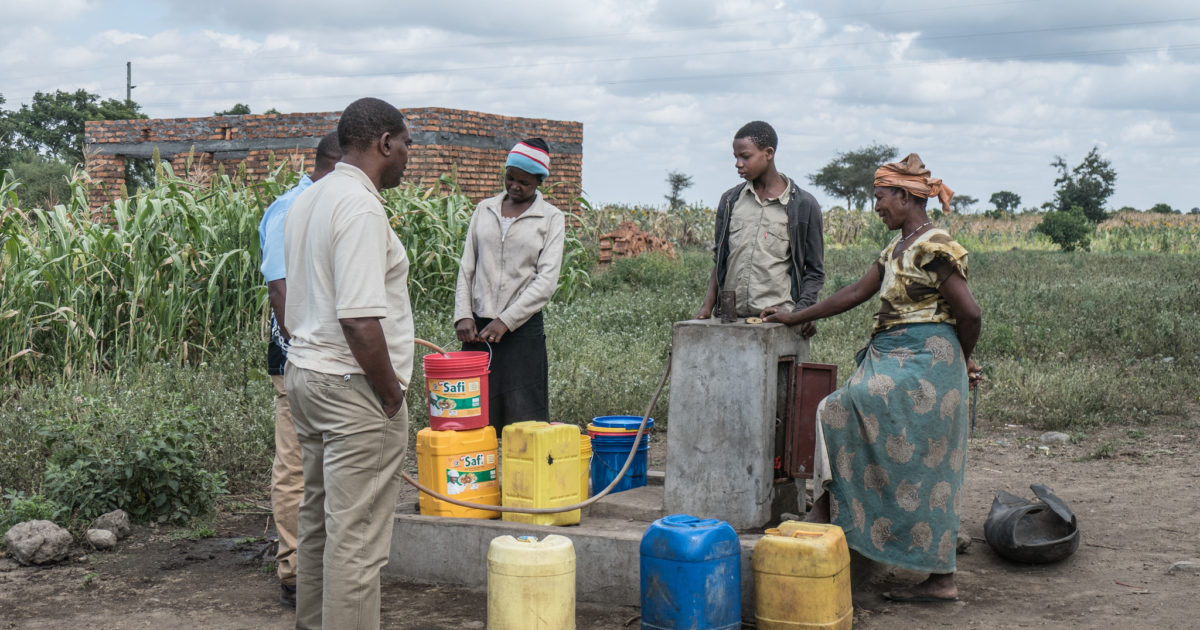

43% of all Tanzanians do not have reliable and close water sources according to the Joint Monitoring Programme by the WHO and Unicef [1]. As a basic necessity many families have to travel for long distances, often by foot, to obtain what water they need to provide for their families.

Surface water is scarce if you don't live near the three large bodies of fresh water. This is exacerbated by the semi-arid or arid conditions across one third of the country. In addition, pollution, regional conflicts, and sanitation or cleanliness are areas of concerns with surface water.

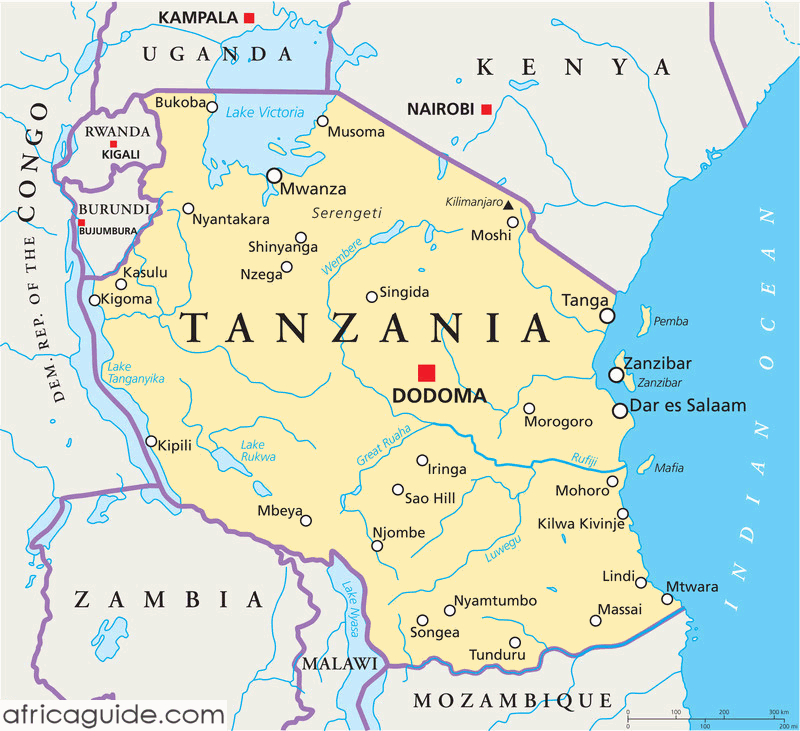

Despite a large and expensive government initiative to modernize and improve the country's water system in the 1980's "free water era", the rural population was still severely under serving rural communities, with over half of the of the rural population still not having access to reliable and clean water. [2]

In 1991, the Tanzanian government shifted the from a government controlled approach and opened up to outside investors and local group management. Here, groundwater wells and pumps were more aggressively pursued as a leading source for potential growth in improving access to safe water for rural communities.

In 2001, the amount of boreholes drilled for ground water had more than quadrupled compared to 1991 levels, and overall household water access had improved by 10% to 56% .

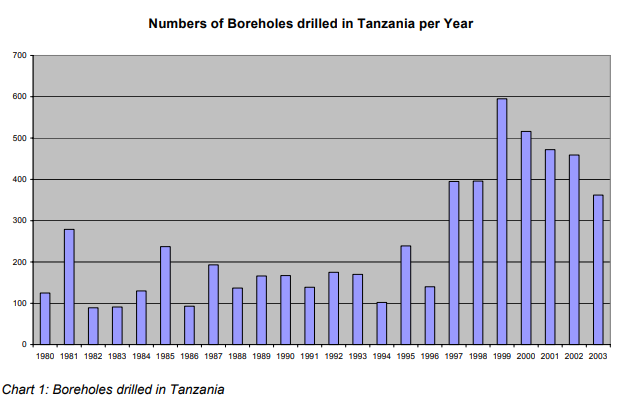 [3, baumann et al, p.14]

With the growing number of boreholes comes a growing amount of pumps. More pumps means more things that can break. A lot of times, these pumps fall into a state of disrepair and are no longer functional leaving the people that rely on these pumps without a reliable source for water. 

What can we do to help prevent these pumps from falling into a non-functional state? Can we help predict when a pump needs repair and complete preventative maintainence in order to reduce overall costs?

Thanks to Taarifa, the Tanzanian Ministry of Water, and DrivenData, we have the data to help solve these questions. Set up as a competition on DrivenData.org, we have over 74,000 wells and pumps with data ranging from location, to installer, and population served to help predict whether the pumps are functional, functional but in need of repair, or non-functional.

## 1 Project Objective : 

The project objective is to predict the functional status of the water pumps based on data set from Taarifa. Specifically, I would like to optimise the "functional needs-repair" status-group as knowing which pumps are functional but need repair would prevent any more costly repairs or replacements by completing preventative maintenance before it is too late.

## 2 Data Wrangling : 

The training data set consists of two different files with the values, and labels separate. 

The [training values](https://github.com/brspencer90/water-pump-tanzania/blob/master/data/raw/training_values.csv) consist of 59400 rows and 40 variables : 

```
['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
'ward', 'population', 'public_meeting', 'recorded_by',
'scheme_management', 'scheme_name', 'permit', 'construction_year',
'extraction_type', 'extraction_type_group', 'extraction_type_class',
'management', 'management_group', 'payment', 'payment_type',
'water_quality', 'quality_group', 'quantity', 'quantity_group',
'source', 'source_type', 'source_class', 'waterpoint_type',
'waterpoint_type_group']
```


The [training labels](https://github.com/brspencer90/water-pump-tanzania/blob/master/data/raw/training_labels.csv)
 consist of three different categories as mentioned above.

```
['functional' 'non functional' 'functional needs repair']
```

The [test data](https://github.com/brspencer90/water-pump-tanzania/blob/master/data/raw/test_values.csv) consists of 14850 rows and 40 variables. This data does not have any labels as the competition objective is to predict the status_group.

The test data will be merged with the training data for the data wrangling and EDA.

### 2.1 Geographic Location

[GeoSpatial Cleaning Notebook](https://github.com/brspencer90/water-pump-tanzania/blob/master/notebooks/data_cleaning_geospatial.ipynb)

First off, I decided the best way to look at the data was geographically. Latitude and longitudes are provided, in addition to regions, and sub districts. I downloaded the shapefiles [5] to map out the regions, lga, and wards (regions and sub regions in descending size), and then plotted the points.

![image](docs/map.png)

From this I was able to notice there were a number of points that weren't mapped properly (eg. missing long / lat, or same region label for Geita, Shinyanga, and Simiyu regions). At this point I started my data cleaning process by fixing the geographic location and mapping as any imputations for missing data would most likely use geographic location.

This cleaning process had three parts : 
* map points with missing long / lat to the center of their assigned ward
* find points that are not within the shapefile boundaries of their given 'region' and assign appropriate 'region'
* find points that are not within their given 'LGA', and assign appropriate 'LGA'

![image](docs/map_post.png)

Wards were ignored due to the specificity of the sub-region, but could be assessed at a later point in order to improve future imputations of missing data.

The geolocation and shapefiles were managed using the geopandas library.

### 2.2 Missing Data

[Data Cleaning Notebook](https://github.com/brspencer90/water-pump-tanzania/blob/master/notebooks/Data_Cleaning.ipynb)

The data cleaning process for the data is more complicated than just replacing "N/A" or "null" values. Unfortunately many of these features have a significant amount of 'zero' values. For instance look at the 'amount_tsh' feature below : 

```
df['amount_tsh'].value_counts(sort=True)[:3]
```

```
0.0         52049
500.0        3874
50.0         3103
Name: amount_tsh, dtype: int64
```

Nearly 70% of the data reads 0. Could this be valid data? Yes. Could it also include invalid or empty data input? Also yes. How do we differentiate between this with this feature or with other features? Best thing to do is check each feature individually. This feature shows the static pressure at the pump head - where a zero is a possible value (i.e. no flow).

Conversely, the construction year has the following data : 

```
df['construction_year'].value_counts(sort=True)[:3]
```

```
0       25969
2010     3314
2008     3243
Name: construction_year, dtype: int64
```

Here 0 is clearly an invalid value and will need to be replaced - here we used the median value for construciton year.

20 features were removed due to either repetition and collinearity, or invalid values and not-imputable values. In addition, one feature was added - 'pump_age' - which is a combination of 'year_recorded' and 'construction year'.

```
df.info()
```

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 74249
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     74250 non-null  int64   
 1   amount_tsh             74250 non-null  float64 
 2   gps_height             74250 non-null  int64   
 3   installer              74250 non-null  object  
 4   longitude              74250 non-null  float64 
 5   latitude               74250 non-null  float64 
 6   basin                  74250 non-null  object  
 7   region                 74250 non-null  object  
 8   district_code          74250 non-null  int64   
 9   population             74250 non-null  int64   
 10  public_meeting         74250 non-null  int32   
 11  permit                 74250 non-null  int32   
 12  extraction_type_class  74250 non-null  category
 13  management             74250 non-null  category
 14  payment_type           74250 non-null  category
 15  water_quality          74250 non-null  category
 16  quantity               74250 non-null  category
 17  source                 74250 non-null  category
 18  source_class           74250 non-null  object  
 19  waterpoint_type        74250 non-null  category
 20  pump_age               74250 non-null  float64 
dtypes: category(7), float64(4), int32(2), int64(4), object(4)
memory usage: 10.4+ MB
```

## 3 EDA and Pre-processing

[Pre-processing notebook](https://github.com/brspencer90/water-pump-tanzania/blob/master/notebooks/pre_processing.ipynb)

In this section we look at the relationship between the individual features and the predictor variable, status_group, as well as prep the features for one-hot encoding and feature reduction modelling.

Each individual feature is analysed graphically, and then an assessment is made to reduce the number of unique entries before one-hot encoding. Here's an example of the feature 'installer' which has 2410 unique labels. This large number of labels couldn't be viewed graphically, so this is an example of a reduced the number of instances to reduce overall dimensionality.

![image](docs/installer.png)

And then after one hot encoding : 

![image](docs/installer_df.png)

After all features were encoded and a total of 100 features were included for the final modelling.


## 4 Modelling 

[Modelling notebook](https://github.com/brspencer90/water-pump-tanzania/blob/master/notebooks/modelling.ipynb)

Now that the testing and training data have been separated we can dive into the 'status_group' labels. How are these labels distributed?

```
df['status_group'].value_counts(normalize=True)
```

```
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64
```

There's a pretty big imbalance in the status group. Most likely we'll have to see how the performance goes but we'll have to try SMOTE. Let's set up a training set for normal data, and SMOTE data.

### 4.1 Train / Test Split and Label Balancing

First we create X, and y. Then we encode the predictive variables so we can use whatever model we want and not have to revisit it. We'll use a label encoder to change the 'status_group' into a numerical-categorical labels, then create a dictionary to be able to redefine the labels into its original names.

```
df_col = df_train.columns.to_list()

X = df_train.drop(['id','status_group'],axis=1)

label_enc = LabelEncoder()

y = label_enc.fit_transform(df_train['status_group'])

label_dict = dict(zip(list(set(y)),label_enc.inverse_transform(list(set(y))).tolist()))
```

Next we create the train / test split using sklearn's train test split.

```
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(pd.Series(y_train).value_counts().sort_index())
```

```
0    24161
1     3243
2    17146
dtype: int64
```

Here we can see the imbalance again with 'functional needs repair'. Let's try to see how it'll work if we use SMOTE to try to balance the data set.

```
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

print(pd.Series(y_train_smote).value_counts())
```

```
0    24161
1    24161
2    24161
dtype: int64
```

Classes are now balanced. Let's start with the modelling.

### 4.2.1 Modelling - Random Forest Classifier

We'll try running the Random Forest Classifier with both standard and SMOTE data sets. With the non-SMOTE dataset we'll try to optimise score on the needing repair label, and use Grid Search CV to optimize parameters.

#### 4.2.1.1 Random Forest - Standard Dataset

```
model = RandomForestClassifier()
scaler = StandardScaler()
feat_sel = SelectKBest(score_func=f_classif)

grid_params = {
    'model__random_state': [123], 
    'scaler' : [StandardScaler()],
    'feat_sel__k': [92], 
    'model__n_estimators': [50],
    'model__criterion': ['gini'],
}

RFC_base_pipe = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),scoring=recall_repair_scorer,cv=5,param_grid=grid_params,n_jobs=-1)

RFC_base_pipe.fit(X_train,y_train)

y_pred = RFC_base_pipe.predict(X_test)

classification_report(y_test,y_pred,target_names=list(label_dict.values()))
```

```
                         precision    recall  f1-score   support

             functional       0.80      0.87      0.84      8098
functional needs repair       0.49      0.34      0.40      1074
         non functional       0.83      0.77      0.80      5678

               accuracy                           0.80     14850
              macro avg       0.71      0.66      0.68     14850
           weighted avg       0.79      0.80      0.79     14850
```

The optimised base RFC model performs pretty well, overall accuracy is very high, however the recall score for the needs repair label is quite low. Let's see if we can improve on that with using the SMOTE dataset.

#### 4.2.1.2 Random Forest - SMOTE Dataset

```
grid_params = {
    'model__random_state': [123], 
    'scaler' : [MinMaxScaler()],
    'feat_sel__k': [99], 
    'model__n_estimators': [219],
    'model__criterion': ['gini'],
}

RFC_base_pipe = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),scoring=recall_repair_scorer,cv=5,param_grid=grid_params,n_jobs=-1)

RFC_base_pipe.fit(X_train_smote,y_train_smote)

y_pred = RFC_base_pipe.predict(X_test)

classification_report(y_test,y_pred,target_names=list(label_dict.values()))
```

```
                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      8098
functional needs repair       0.43      0.43      0.43      1074
         non functional       0.81      0.78      0.79      5678

               accuracy                           0.79     14850
              macro avg       0.69      0.68      0.68     14850
           weighted avg       0.79      0.79      0.79     14850
```

The SMOTE dataset does look to improve the recall for 'needs repair' label, at the expense of precision and accuracy. However, correctly predicting 'needs repair' is our objective so this is the best model we have so far. 

### 4.2.1 XGBoost Classifier

Next we'll try to run the model using XGBoost classifier using the softmax objective.

#### 4.2.1.1 XGBoost - Standard Dataset

```
model = XGBClassifier(objective='multi:softmax',booster='gbtree',use_label_encoder=False)
scaler = StandardScaler()
feat_sel = SelectKBest(score_func=f_classif)

grid_params = {
    'scaler': [StandardScaler()], #MinMaxScaler(),None]
    'feat_sel__k': [80], #np.arange(10,X.shape[1]+1,step=1),
    'model__learning_rate': [0.9], #np.arange(0,1.1,step=0.1),
    'model__gamma' : [0], #np.arange(0,1.1,step=0.1),
    'model__lambda' : np.arange(0,1.1,step=0.1),
    #'model__alpha' : [0], #np.arange(0,1.1,step=0.1),
    #'model__n_estimators': [50],
    #'model__max_depth' : np.arange(1,10,step=1),  
}

XGB_base_pipe = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),scoring=recall_repair_scorer,cv=5,param_grid=grid_params,n_jobs=-1)

XGB_base_pipe.fit(X_train,y_train)

y_pred = XGB_base_pipe.predict(X_test)

classification_report(y_test,y_pred,target_names=list(label_dict.values()))
```

```

```


#### 4.2.1.1 XGBoost - SMOTE Dataset

```
model = XGBClassifier(objective='multi:softmax',booster='gbtree',use_label_encoder=False)
scaler = StandardScaler()
feat_sel = SelectKBest(score_func=f_classif)

grid_params = {
    'scaler': [StandardScaler()], #MinMaxScaler(),None]
    'feat_sel__k': [80], #np.arange(10,X.shape[1]+1,step=1),
    'model__learning_rate': [0.9], #np.arange(0,1.1,step=0.1),
    'model__gamma' : [0], #np.arange(0,1.1,step=0.1),
    'model__lambda' : np.arange(0,1.1,step=0.1),
    #'model__alpha' : [0], #np.arange(0,1.1,step=0.1),
    #'model__n_estimators': [50],
    #'model__max_depth' : np.arange(1,10,step=1),  
}

XGB_base_pipe = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),scoring=recall_repair_scorer,cv=5,param_grid=grid_params,n_jobs=-1)

XGB_base_pipe.fit(X_train_smote,y_train_smote)

y_pred = XGB_base_pipe.predict(X_test)

classification_report(y_test,y_pred,target_names=list(label_dict.values()))
```

[1] = https://lifewater.org/blog/tanzania-water-crisis-facts/
[2] = http://gw-africa.iwmi.org/wp-content/uploads/sites/23/2018/10/Country_Report-Tanzania.pdf
[3] = https://sswm.info/sites/default/files/reference_attachments/BAUMANN%20et%20al%202005%20Rationalization%20of%20Drilling%20Operations%20in%20Tanzania.pdf

[4] = http://wpm.maji.go.tz/
[5] = https://data.humdata.org/dataset/tanzania-administrative-boundaries-level-1-to-3-regions-districts-and-wards-with-2012-population